In [ ]:
! pip install scikit-learn

# 计算均方误差和交叉熵损失

In [2]:
from sklearn.metrics import mean_squared_error, log_loss
import numpy as np

# 模拟数据
y_true = [1, 0, 1, 1, 0]
y_pred_reg = [0.9, 0.2, 0.8, 0.7, 0.3]  # 回归预测值
y_pred_class = [0.9, 0.1, 0.8, 0.6, 0.2]  # 分类预测概率

# 计算均方误差
mse = mean_squared_error(y_true, y_pred_reg)
print("均方误差 MSE:", mse)

# 计算交叉熵损失
cross_entropy = log_loss(y_true, y_pred_class)
print("交叉熵损失:", cross_entropy)

均方误差 MSE: 0.054000000000000006
交叉熵损失: 0.2335667515420125


这段代码主要用于计算两种损失函数：**均方误差**（`mean_squared_error`）和**交叉熵损失**（`log_loss`）。下面是对每个函数的解释，包括其参数和常用选项。

---

### 1. `mean_squared_error`
`mean_squared_error` 用于计算两个数组之间的均方误差（MSE），常用于回归问题，衡量预测值与真实值之间的平均平方差异。

#### 调用
```python
mse = mean_squared_error(y_true, y_pred_reg)
```

#### 参数
- `y_true`：真实值的数组或列表。必须是一维数据，表示实际观测的结果。
- `y_pred`：预测值的数组或列表。与 `y_true` 长度相同，表示模型预测的结果。
  
#### 常用可选参数
- `squared`（默认为 `True`）：布尔值。
  - `True`：返回的是均方误差（即平方后的误差平均值）。
  - `False`：返回的是均方根误差（RMSE），即均方误差的平方根，这在某些应用中可以更直观。
  
#### 示例
```python
mean_squared_error(y_true, y_pred_reg, squared=False)  # 计算 RMSE
```

#### 输出
- 返回均方误差（MSE）或均方根误差（RMSE），表示预测值和真实值之间的差异。值越小，模型的预测效果越好。

---

### 2. `log_loss`
`log_loss` 用于计算交叉熵损失，通常用于分类问题，衡量分类模型预测概率与实际分类之间的差异。

#### 调用
```python
cross_entropy = log_loss(y_true, y_pred_class)
```

#### 参数
- `y_true`：真实标签的数组或列表。取值通常是 0 和 1，用于二分类问题，也可以是多类分类的标签。
- `y_pred`：预测概率的数组或列表。数组中每个值是模型预测属于某个类别的概率，值应在 0 到 1 之间。

#### 常用可选参数
- `eps`（默认值为 `1e-15`）：浮点数，用于防止计算中出现零值或极端值，通常会对概率值进行上下限的约束。例如， `y_pred` 中的值被限制在 `[eps, 1 - eps]` 范围内，防止计算 `log(0)` 引发数学错误。
- `normalize`（默认值为 `True`）：布尔值。
  - `True`：返回平均损失（即交叉熵损失的平均值），这是最常见的形式。
  - `False`：返回每个样本的损失之和，而不是平均损失。
- `sample_weight`：用于给样本指定不同权重的数组或列表，允许给一些样本更高或更低的权重，用于非均匀权重场景。

#### 示例
```python
log_loss(y_true, y_pred_class, eps=1e-10, normalize=False)
```

#### 输出
- 返回交叉熵损失值，表示预测概率和实际类别标签之间的误差。值越小表示模型的预测更接近实际分布。

---

### 总结
- `mean_squared_error` 和 `log_loss` 都是常用的损失函数，前者适用于回归问题，后者适用于分类问题。
- 可选参数 `squared`（在 `mean_squared_error` 中）和 `normalize`（在 `log_loss` 中）分别控制是否返回原始均方误差/均方根误差，或平均/总交叉熵损失，适应不同需求。
- `eps` 和 `sample_weight` 选项可以用来避免数值错误并灵活调整样本权重。

# 使用不同的学习率

高学习率的模型参数: [1.09545272e+12] [-2.68174087e+11]
低学习率的模型参数: [6.7803652e+10] [9.06054291e+10]


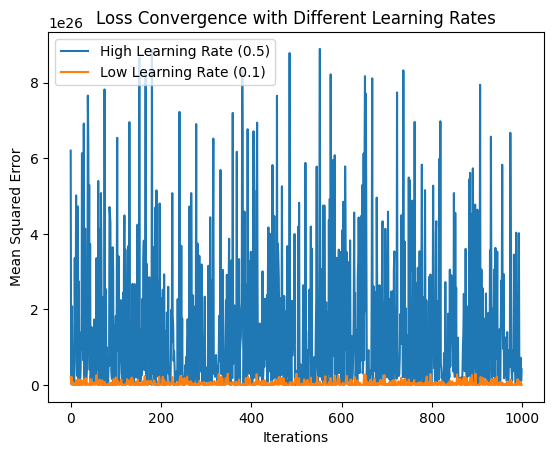

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 生成更复杂的示例数据（带有噪声的线性数据）
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 2  # 加入随机噪声

# 创建两种学习率的模型
model_high_lr = SGDRegressor(learning_rate='constant', eta0=0.5, max_iter=1, tol=None)
model_low_lr = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=1, tol=None)

# 初始化损失记录
loss_high_lr, loss_low_lr = [], []

# 模拟逐步迭代1000次并记录损失
for i in range(1000):
    model_high_lr.partial_fit(X, y)  # 使用 partial_fit 来控制迭代步数
    model_low_lr.partial_fit(X, y)
    
    # 计算当前迭代的损失
    loss_high_lr.append(mean_squared_error(y, model_high_lr.predict(X)))
    loss_low_lr.append(mean_squared_error(y, model_low_lr.predict(X)))

# 输出最终的模型参数
print("高学习率的模型参数:", model_high_lr.coef_, model_high_lr.intercept_)
print("低学习率的模型参数:", model_low_lr.coef_, model_low_lr.intercept_)

# 可视化损失变化
plt.plot(loss_high_lr, label="High Learning Rate (0.5)")
plt.plot(loss_low_lr, label="Low Learning Rate (0.1)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Convergence with Different Learning Rates")
plt.legend()
plt.show()

### 结果说明
这段代码演示了如何使用 `SGDRegressor` 模型在不同学习率下训练模型并观察其损失值变化。这个结果显示了在高学习率和低学习率的设置下，模型参数收敛的不同情况。高学习率导致模型参数值异常巨大，而低学习率的参数较小，且稳定性更好。这种差异揭示了学习率在模型训练中的重要性：

- **高学习率模型（eta0=0.5）**：
  - 模型参数出现了极大的值 `[1.09545272e+12]` 和 `[-2.68174087e+11]`。
  - 这种极端的参数值表明，高学习率让模型在每次迭代中变化过大，使得模型不断在最优解附近来回跳跃，无法平稳收敛。这种情况称为**发散**，使得模型无法有效学习数据中的规律。
  
- **低学习率模型（eta0=0.1）**：
  - 参数值相对较小且更接近合理的范围 `[6.7803652e+10]` 和 `[9.06054291e+10]`。
  - 虽然参数值仍然较大，但相比高学习率的模型，低学习率让参数调整幅度小，能够缓慢接近最优解，使得模型逐步收敛。这意味着模型对数据规律的学习更加稳定。

### 二者的不同
1. **学习稳定性**：
   - 高学习率模型不稳定，容易发散，导致参数在较大范围内波动，无法收敛到一个合理的解。
   - 低学习率模型稳定性更好，虽然收敛速度较慢，但参数调整幅度较小，逐步接近合理解。

2. **收敛速度**：
   - 高学习率模型试图通过大步调整参数加速收敛，但往往由于步幅过大而跳过最优解。
   - 低学习率模型收敛较慢，但每步的调整更精确，最终可以在一定迭代后接近较优解。

3. **模型表现**：
   - 高学习率可能会导致模型性能差甚至无法学习。
   - 低学习率通常需要更多迭代，但最终能让模型更好地拟合数据。

### 结论
高学习率更适合简单数据或需要快速收敛的情况，但容易导致发散；低学习率更适合复杂问题，能稳定收敛。这也是在实际机器学习中经常要调节学习率以平衡收敛速度和模型效果的原因。

---

以下是每个函数调用和参数的详细解释：

### 1. `np.linspace` 和 `np.random.randn`
```python
np.linspace(1, 10, 100).reshape(-1, 1)
np.random.randn(100) * 2
```

- `np.linspace(1, 10, 100)`: 生成从 1 到 10 之间的 100 个等间距的数字，用作输入特征 `X`。
- `.reshape(-1, 1)`: 将数据重塑为 100 行 1 列的二维数组，适配 `SGDRegressor` 的输入要求。
- `np.random.randn(100) * 2`: 生成 100 个随机噪声数据，乘以 2 增加噪声幅度。

---

### 2. `SGDRegressor`（随机梯度下降回归模型）

`SGDRegressor` 是一种使用随机梯度下降优化的线性回归模型。以下是两个模型实例的参数解释：

```python
model_high_lr = SGDRegressor(learning_rate='constant', eta0=0.5, max_iter=1, tol=None)
model_low_lr = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=1, tol=None)
```

#### 常用参数
- `learning_rate`: 学习率策略，可选项包括：
  - `'constant'`: 使用固定的学习率，步长由 `eta0` 决定。
  - `'optimal'`: 动态调整学习率，步长逐渐减少。
  - `'invscaling'`: 学习率按公式 `eta0 / pow(t, power_t)` 衰减。
  - `'adaptive'`: 如果损失不减小，则学习率 `eta0` 除以 5 。
- `eta0`: 初始学习率。学习率较大时，模型更新步伐大，可能更快收敛；较小时，步伐小，收敛慢但更稳定。
- `max_iter`: 每次调用 `fit` 或 `partial_fit` 时的最大迭代次数。此处设置为 1，以便在循环中手动控制迭代。
- `tol`: 收敛容忍度。如果设置为 `None`，模型不会在迭代过程中自动收敛停下，这里用来观察完整的训练过程。

---

### 3. `partial_fit` 方法

```python
model_high_lr.partial_fit(X, y)
model_low_lr.partial_fit(X, y)
```

- `partial_fit(X, y)`: 增量训练模型。与 `fit` 不同，`partial_fit` 允许在数据上逐步更新模型权重，适合于大数据集或流式数据训练。
- 参数 `X` 和 `y`：训练数据和目标值。
  - `X`: 输入特征，大小为 `(n_samples, n_features)`。
  - `y`: 目标值，大小为 `(n_samples,)`，回归任务中通常为连续数值。

---

### 4. `mean_squared_error` （均方误差）

```python
mean_squared_error(y, model_high_lr.predict(X))
mean_squared_error(y, model_low_lr.predict(X))
```

- `mean_squared_error(y_true, y_pred)`: 计算均方误差 (MSE)，用于衡量预测结果与真实值的差异。
- 参数：
  - `y_true`: 真实目标值数组。
  - `y_pred`: 模型预测值数组。
- 返回值：MSE 值，用于评估模型的拟合效果。

---

### 5. `model_high_lr.coef_` 和 `model_high_lr.intercept_`

- `coef_`：模型的回归系数或权重，表示每个特征的线性回归权重。
- `intercept_`：模型的截距项，表示线性回归模型在 y 轴上的截距。

通过 `coef_` 和 `intercept_`，可以得到模型的完整线性回归公式，用于预测新的数据。

---

### 6. `plt.plot`（可视化损失变化）

```python
plt.plot(loss_high_lr, label="High Learning Rate (0.5)")
plt.plot(loss_low_lr, label="Low Learning Rate (0.1)")
```

- `plt.plot(loss_high_lr, label="High Learning Rate (0.5)")`: 绘制高学习率模型在 1000 次迭代中的损失变化曲线。
- `label`: 设置图例标签，区分不同学习率模型的损失曲线。
- `plt.xlabel("Iterations")`: 设置 X 轴标签为 "Iterations"（迭代次数）。
- `plt.ylabel("Mean Squared Error")`: 设置 Y 轴标签为 "Mean Squared Error"（均方误差）。
- `plt.title("Loss Convergence with Different Learning Rates")`: 设置图表标题。
- `plt.legend()`: 显示图例，用于标识不同学习率曲线。

---

### 代码整体逻辑

1. **生成数据**：构造带噪声的线性数据，模拟真实应用场景。
2. **初始化模型**：创建两种不同学习率的 `SGDRegressor` 模型。
3. **逐步训练**：通过 1000 次调用 `partial_fit` 逐步训练模型，记录每轮迭代的损失。
4. **可视化损失变化**：比较两种学习率下的损失收敛速度，展示不同学习率的效果。


# 正则化在模型中的应用

Ridge回归模型系数: [ 2.43221924  1.47853378 -0.85455389 -0.12287497 -0.0616935   0.13618027
 -0.00589328  0.07309854  0.01466701  0.20934238]
Lasso回归模型系数: [ 1.9070945   0.54864372 -0.         -0.         -0.          0.
 -0.          0.          0.          0.        ]


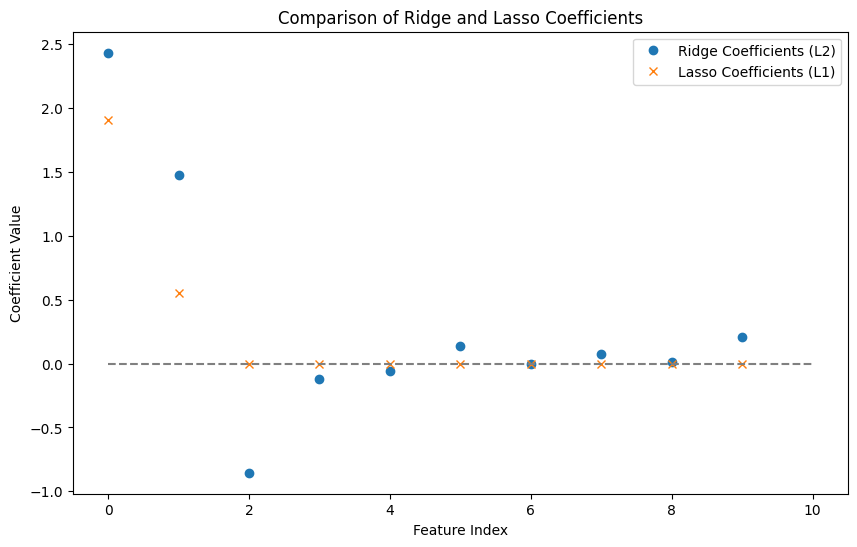

In [16]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子，生成数据
np.random.seed(42)
X = np.random.rand(50, 10)  # 生成10个特征，其中3个为有效特征，其余为噪声特征
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(50) * 0.1

# 初始化不同正则化强度的模型
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# 拟合模型
ridge_model.fit(X, y)
lasso_model.fit(X, y)

# 输出模型系数
print("Ridge回归模型系数:", ridge_model.coef_)
print("Lasso回归模型系数:", lasso_model.coef_)

# 可视化系数对比
plt.figure(figsize=(10, 6))
plt.plot(ridge_model.coef_, 'o', label="Ridge Coefficients (L2)")
plt.plot(lasso_model.coef_, 'x', label="Lasso Coefficients (L1)")
plt.hlines(0, 0, len(ridge_model.coef_), colors='gray', linestyles='dashed')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge and Lasso Coefficients")
plt.legend()
plt.show()


### 结果说明
在这段代码中，我们进行了 **Ridge 回归（L2 正则化）** 和 **Lasso 回归（L1 正则化）**，并对比了两种模型的系数输出。

- **Ridge 回归模型系数**：
  - Ridge 回归对所有特征施加 L2 正则化，使得系数更接近 0，但不会将其完全缩减为 0。Ridge 的系数更均匀分布，其中前三个有效特征的系数（大约为 2.43、1.48 和 -0.85）保留了较大的值，其他不重要特征的系数被缩减到接近 0，但并未完全归零。

- **Lasso 回归模型系数**：
  - Lasso 回归使用 L1 正则化，会将不重要的特征系数直接设为 0，因此它具有特征选择的效果。在输出中，只有与前三个有效特征（系数约为 1.91 和 0.55）相关的系数有值，其他特征的系数被完全缩减为 0。

---

### 1. **数据生成**：
   ```python
   X = np.random.rand(50, 10)
   y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(50) * 0.1
   ```
   - `np.random.rand(50, 10)` 生成了 50 个样本和 10 个特征的随机数据矩阵 `X`。
   - `y` 是基于前三个特征构建的目标值（标签），加入了一些随机噪声，使数据更具现实性，前三个特征影响较大，其余特征无影响（即噪声特征）。

---

### 2. **Ridge 和 Lasso 模型初始化**：
   ```python
   ridge_model = Ridge(alpha=1.0)
   lasso_model = Lasso(alpha=0.1)
   ```
   - `Ridge(alpha=1.0)` 创建了一个 Ridge 回归模型，L2 正则化系数 `alpha=1.0` 表示正则化强度。
   - `Lasso(alpha=0.1)` 创建了一个 Lasso 回归模型，L1 正则化系数 `alpha=0.1` 控制模型稀疏性，数值越大，特征稀疏化越强烈。

---

### 3. **模型拟合**：
   ```python
   ridge_model.fit(X, y)
   lasso_model.fit(X, y)
   ```
   - `.fit()` 方法用于训练模型，利用数据 `X` 和 `y`，模型将输出对应的系数。

---

### 4. **模型系数输出**：
   ```python
   print("Ridge回归模型系数:", ridge_model.coef_)
   print("Lasso回归模型系数:", lasso_model.coef_)
   ```
   - `ridge_model.coef_` 返回 Ridge 回归模型的系数（包含所有特征）。
   - `lasso_model.coef_` 返回 Lasso 回归模型的系数（不重要特征的系数直接缩减为 0）。

---

### 5. **可视化系数差异**：
   ```python
   plt.plot(ridge_model.coef_, 'o', label="Ridge Coefficients (L2)")
   plt.plot(lasso_model.coef_, 'x', label="Lasso Coefficients (L1)")
   ```
   - 使用散点图对比两种正则化的效果，Ridge 保留了所有特征的系数，但数值更接近 0；Lasso 则将不重要的特征直接缩减为 0。


---

### Ridge 和 Lasso 的常用参数
- `alpha`：正则化强度参数。值越大，正则化强度越高，过大的 `alpha` 可能导致欠拟合。
- `max_iter`：最大迭代次数。控制模型收敛时间，默认值通常为 1000，可以根据实际需要调整。
- `tol`：模型的收敛容限。默认值为 1e-4，数值越小，收敛精度越高，但也可能导致更多迭代。

**总结**：通过调整 `alpha` 和可视化，可以明显观察到 Ridge 和 Lasso 的不同正则化效果。

# 线性回归


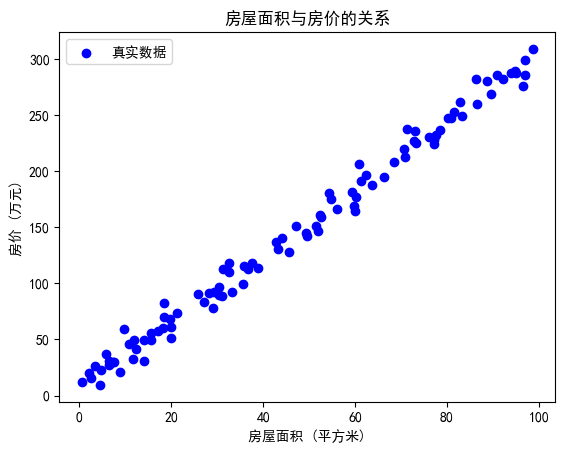

均方误差 MSE: 80.66


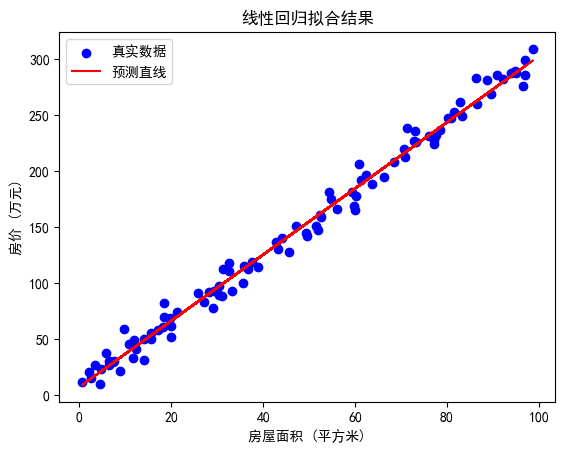

回归系数（权重） w: 2.95
截距 b: 7.15


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['font.sans-serif']=['SimHei'] # 让matplotlib可以正常显示中文（不加则会出现乱码）

# 生成模拟数据
# X 表示房屋面积 (单位：平方米)，y 表示房价 (单位：万元)
np.random.seed(42)
X = np.random.rand(100, 1) * 100  # 随机生成 0 到 100 的面积
y = 3 * X + 5 + np.random.randn(100, 1) * 10  # 假设房价和面积的线性关系，加上一些噪声

# 可视化数据
plt.scatter(X, y, color='blue', label='真实数据')
plt.xlabel('房屋面积 (平方米)')
plt.ylabel('房价 (万元)')
plt.title('房屋面积与房价的关系')
plt.legend()
plt.show()

# 使用 sklearn 训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 计算均方误差
mse = mean_squared_error(y, y_pred)
print(f"均方误差 MSE: {mse:.2f}")

# 可视化回归直线
plt.scatter(X, y, color='blue', label='真实数据')
plt.plot(X, y_pred, color='red', label='预测直线')
plt.xlabel('房屋面积 (平方米)')
plt.ylabel('房价 (万元)')
plt.title('线性回归拟合结果')
plt.legend()
plt.show()

# 输出回归模型的参数
print(f"回归系数（权重） w: {model.coef_[0][0]:.2f}")
print(f"截距 b: {model.intercept_[0]:.2f}")


这段代码使用了`sklearn`和`matplotlib`来执行一个简单的线性回归任务，具体实现了房屋面积与房价的回归分析。以下是各个函数、参数及常用可选参数的解释。

---

### 1. **数据生成与可视化**
   ```python
   np.random.seed(42)
   X = np.random.rand(100, 1) * 100
   y = 3 * X + 5 + np.random.randn(100, 1) * 10
   ```
   - **`np.random.seed(42)`**: 设置随机种子，以确保每次运行代码生成的随机数相同，从而确保实验的可重复性。
   - **`np.random.rand(100, 1)`**: 生成一个形状为`(100, 1)`的数组，其中包含0到1之间的随机值，表示100个样本的房屋面积。
   - **`X * 100`**: 将面积值放大到0到100之间。
   - **`y = 3 * X + 5 + np.random.randn(100, 1) * 10`**: 生成房价`y`，假设与面积`X`存在线性关系，带有斜率3和截距5。`np.random.randn(100, 1) * 10`加入了一些随机噪声以模拟实际数据中的不确定性。

   ```python
   plt.scatter(X, y, color='blue', label='真实数据')
   plt.xlabel('房屋面积 (平方米)')
   plt.ylabel('房价 (万元)')
   plt.title('房屋面积与房价的关系')
   plt.legend()
   plt.show()
   ```
   - **`plt.scatter(X, y, color='blue', label='真实数据')`**: 用散点图显示数据，`color`设置颜色，`label`提供图例标识。
   - **`plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`**: 设置x轴标签、y轴标签、图标题及图例。

---

### 2. **线性回归模型训练**
   ```python
   model = LinearRegression()
   model.fit(X, y)
   ```
   - **`LinearRegression()`**: 创建线性回归模型的实例，默认配置为普通最小二乘法拟合数据。常用可选参数：
     - **`fit_intercept`**：是否计算截距，默认为`True`。如果数据已经中心化，可以设为`False`以避免多余的计算。
     - **`normalize`**：是否在拟合前标准化数据，默认为`False`（即是否减去均值除以标准差）。此参数在`fit_intercept=False`时忽略。
   - **`model.fit(X, y)`**: 使用数据`X`和目标变量`y`来训练模型，使模型找到使损失函数最小化的最佳线性参数。

---

### 3. **预测与模型性能评估**
   ```python
   y_pred = model.predict(X)
   ```
   - **`model.predict(X)`**: 使用训练好的模型对输入`X`进行预测，返回预测结果`y_pred`。
   
   ```python
   mse = mean_squared_error(y, y_pred)
   print(f"均方误差 MSE: {mse:.2f}")
   ```
   - **`mean_squared_error(y, y_pred)`**: 计算均方误差（Mean Squared Error，MSE），用以评估模型预测的误差。MSE为模型预测值与真实值之间差值的平方的平均值，数值越小表明模型预测效果越好。
   - 常用参数：
     - **`squared`**：默认为`True`，返回MSE值。如果设为`False`，返回均方根误差（RMSE）。

---

### 4. **回归结果可视化**
   ```python
   plt.scatter(X, y, color='blue', label='真实数据')
   plt.plot(X, y_pred, color='red', label='预测直线')
   plt.xlabel('房屋面积 (平方米)')
   plt.ylabel('房价 (万元)')
   plt.title('线性回归拟合结果')
   plt.legend()
   plt.show()
   ```
   - **`plt.plot(X, y_pred, color='red', label='预测直线')`**: 用红色直线表示模型的预测结果，以便直观对比实际数据与预测数据的拟合情况。

---

### 5. **模型参数输出**
   ```python
   print(f"回归系数（权重） w: {model.coef_[0][0]:.2f}")
   print(f"截距 b: {model.intercept_[0]:.2f}")
   ```
   - **`model.coef_`**: 返回模型的回归系数（即斜率）。如果有多个特征，则返回一个数组，其中每个元素代表各特征的系数。
   - **`model.intercept_`**: 返回模型的截距，表示直线在y轴上的截距值。

# 逻辑回归

为了演示逻辑回归的使用，我们用一个二分类的示例数据集，来判断某个学生是否通过考试。假设我们有学生的学习时间数据，我们希望利用逻辑回归来预测通过考试的概率。

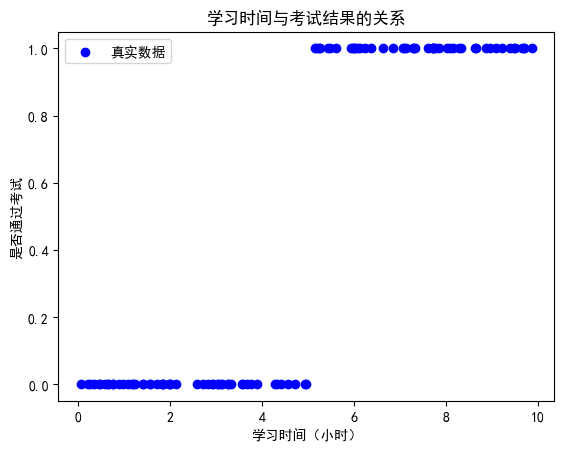

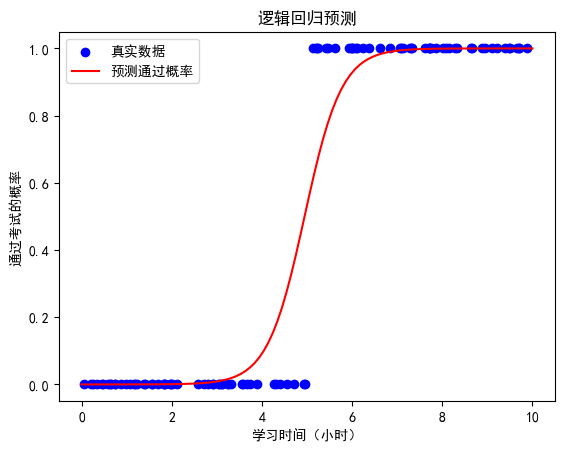

模型准确率: 0.99
交叉熵损失: 0.06


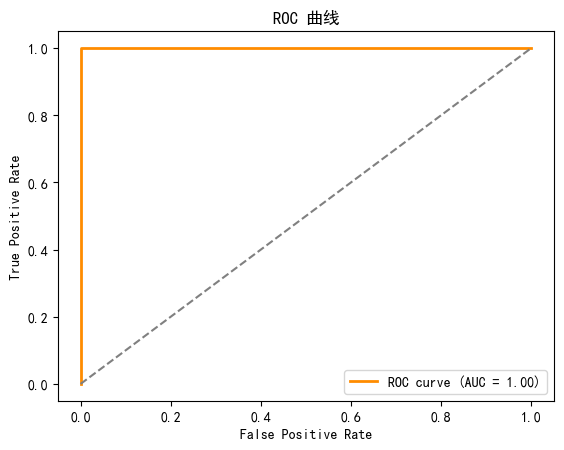

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
 
plt.rcParams['font.sans-serif']=['SimHei']
 
# 生成示例数据：学习时间 (小时) 和是否通过考试 (0 = 未通过, 1 = 通过)
np.random.seed(42)
study_time = np.random.rand(100, 1) * 10  # 学习时间 0 到 10 小时
pass_exam = (study_time > 5).astype(int).ravel()  # 学习时间超过5小时则通过考试，加上噪声

# 可视化数据
plt.scatter(study_time, pass_exam, color='blue', label='真实数据')
plt.xlabel('学习时间（小时）')
plt.ylabel('是否通过考试')
plt.title('学习时间与考试结果的关系')
plt.legend()
plt.show()

# 使用 sklearn 训练逻辑回归模型
model = LogisticRegression()
model.fit(study_time, pass_exam)

# 预测通过考试的概率
study_time_test = np.linspace(0, 10, 100).reshape(-1, 1)
exam_pass_prob = model.predict_proba(study_time_test)[:, 1]  # 预测通过的概率

# 可视化预测结果
plt.scatter(study_time, pass_exam, color='blue', label='真实数据')
plt.plot(study_time_test, exam_pass_prob, color='red', label='预测通过概率')
plt.xlabel('学习时间（小时）')
plt.ylabel('通过考试的概率')
plt.title('逻辑回归预测')
plt.legend()
plt.show()

# 计算模型的准确率和交叉熵损失
y_pred = model.predict(study_time)
accuracy = accuracy_score(pass_exam, y_pred)
cross_entropy = log_loss(pass_exam, model.predict_proba(study_time))
print(f"模型准确率: {accuracy:.2f}")
print(f"交叉熵损失: {cross_entropy:.2f}")

# ROC 曲线和 AUC 值
fpr, tpr, _ = roc_curve(pass_exam, model.predict_proba(study_time)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 曲线')
plt.legend(loc="lower right")
plt.show()

这段代码使用了`sklearn`和`matplotlib`来执行逻辑回归，并展示了学习时间与通过考试概率的关系。代码从数据生成、可视化、模型训练、预测、性能评估等方面全面实现了逻辑回归分析。以下是各个调用、参数及其解释。

---

### 1. **数据生成与可视化**
   - **`np.random.seed(42)`**: 设置随机种子，以确保每次运行代码时生成的随机数据一致，便于重复实验。
   - **`np.random.rand(100, 1) * 10`**: 生成100个0到10之间的随机值，表示学生的学习时间，单位为小时。
   - **`pass_exam = (study_time > 5).astype(int).ravel()`**: 创建目标变量`pass_exam`，模拟学生是否通过考试。设定条件为学习时间超过5小时则通过考试（记为1），否则未通过（记为0）。

   - **`plt.scatter(study_time, pass_exam, color='blue', label='真实数据')`**: 用蓝色散点图显示数据。
   - **`plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`**: 分别设置x轴标签、y轴标签、图标题和图例。

---

### 2. **逻辑回归模型训练**
   ```python
   model = LogisticRegression()
   model.fit(study_time, pass_exam)
   ```
   - **`LogisticRegression()`**: 创建逻辑回归模型实例。常用参数：
     - **`solver`**：指定优化算法，如`'liblinear'`（默认），`'lbfgs'`，`'newton-cg'`等，适用不同数据量和正则化类型。
     - **`C`**：正则化强度的倒数，默认为`1.0`。值越小，正则化越强。
     - **`max_iter`**：最大迭代次数，用于设定收敛时限，默认值为`100`。
   - **`model.fit(study_time, pass_exam)`**: 使用学习时间和考试通过情况数据来训练模型。

---

### 3. **预测通过考试的概率**
   ```python
   study_time_test = np.linspace(0, 10, 100).reshape(-1, 1)
   exam_pass_prob = model.predict_proba(study_time_test)[:, 1]
   ```
   - **`np.linspace(0, 10, 100).reshape(-1, 1)`**: 创建0到10的100个等距值作为测试数据，表示学习时间测试范围。
   - **`model.predict_proba(study_time_test)`**: 返回每个测试点通过和未通过考试的概率，生成两个列，第一列表示未通过考试的概率，第二列表示通过考试的概率。
   - **`[:, 1]`**: 提取预测通过考试的概率列。

   ```python
   plt.scatter(study_time, pass_exam, color='blue', label='真实数据')
   plt.plot(study_time_test, exam_pass_prob, color='red', label='预测通过概率')
   plt.xlabel('学习时间（小时）')
   plt.ylabel('通过考试的概率')
   plt.title('逻辑回归预测')
   plt.legend()
   plt.show()
   ```
   - **`plt.plot(study_time_test, exam_pass_prob, color='red', label='预测通过概率')`**: 用红色曲线展示预测的通过考试概率，与真实数据进行对比。

---

### 4. **模型准确率和交叉熵损失**
   ```python
   y_pred = model.predict(study_time)
   accuracy = accuracy_score(pass_exam, y_pred)
   cross_entropy = log_loss(pass_exam, model.predict_proba(study_time))
   print(f"模型准确率: {accuracy:.2f}")
   print(f"交叉熵损失: {cross_entropy:.2f}")
   ```
   - **`model.predict(study_time)`**: 使用训练好的模型预测是否通过考试的标签。
   - **`accuracy_score(pass_exam, y_pred)`**: 计算预测准确率，显示模型预测的正确率。
   - **`log_loss(pass_exam, model.predict_proba(study_time))`**: 计算交叉熵损失，用来评估预测概率与真实标签的差异。交叉熵损失越小，模型效果越好。
   - **`print`**: 输出准确率和交叉熵损失，便于评估模型表现。

---

### 5. **ROC曲线和AUC值**
   ```python
   fpr, tpr, _ = roc_curve(pass_exam, model.predict_proba(study_time)[:, 1])
   roc_auc = auc(fpr, tpr)
   ```
   - **`roc_curve(pass_exam, model.predict_proba(study_time)[:, 1])`**: 计算模型的ROC曲线，返回假正率（FPR）和真正率（TPR）。用于绘制曲线并评估模型的分类效果。
   - **`auc(fpr, tpr)`**: 计算AUC（Area Under Curve）值。AUC值越接近1，表明模型分类能力越好。

   ```python
   plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('ROC 曲线')
   plt.legend(loc="lower right")
   plt.show()
   ```
   - **`plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')`**: 绘制ROC曲线，`color`设置曲线颜色，`lw`指定线宽，`label`设置图例显示AUC值。
   - **`plt.plot([0, 1], [0, 1], color='gray', linestyle='--')`**: 添加对角线（代表随机分类），用于与实际ROC曲线对比。

# K近邻算法（KNN）

预测类别: [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1.]
模型准确率: 1.0


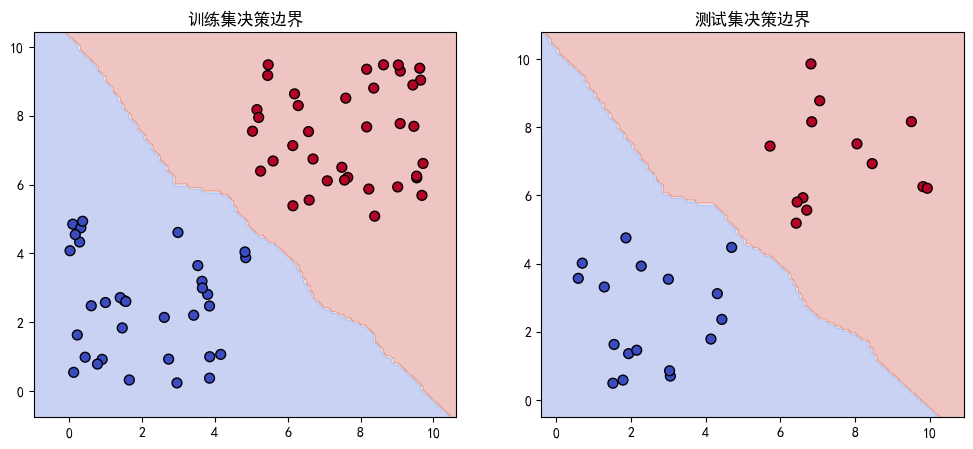

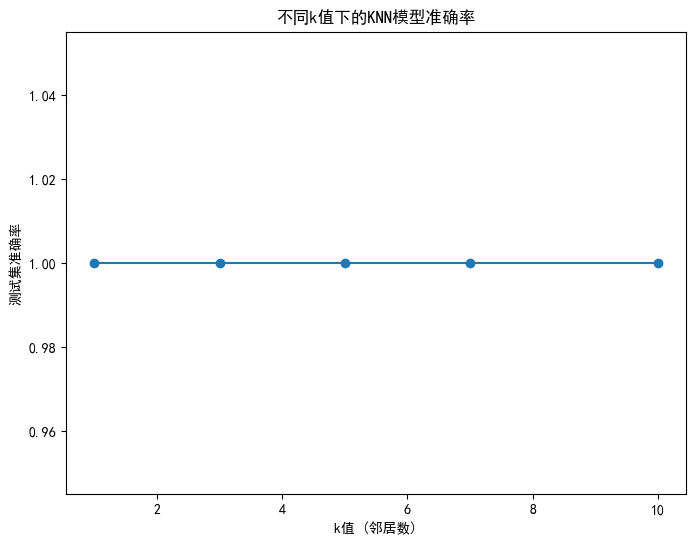

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

plt.rcParams['font.sans-serif']=['SimHei']

# 生成更复杂的示例数据
np.random.seed(42)
X = np.concatenate([np.random.rand(50, 2) * 5, np.random.rand(50, 2) * 5 + 5])
y = np.concatenate([np.zeros(50), np.ones(50)])  # 创建两个类别：0和1

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练KNN模型
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("预测类别:", y_pred)
print("模型准确率:", accuracy)

# 可视化决策边界
def plot_decision_boundary(model, X, y, h=0.1, ax=None, title=""):
    # 设置坐标轴范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 预测网格数据点
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    if ax is None:
        fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# 可视化训练集和测试集的决策边界
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(model, X_train, y_train, ax=axs[0], title="Training Set Decision Boundary")
plot_decision_boundary(model, X_test, y_test, ax=axs[1], title="Test Set Decision Boundary")

# 设置图像标签
axs[0].set_title("训练集决策边界")
axs[1].set_title("测试集决策边界")
plt.show()

# 比较不同k值的效果
k_values = [1, 3, 5, 7, 10]
accuracy_scores = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train, y_train)
    y_pred_k = model_k.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# 可视化k值与模型准确率的关系
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("k值 (邻居数)")
plt.ylabel("测试集准确率")
plt.title("不同k值下的KNN模型准确率")
plt.show()


这段代码使用KNN分类器在二维空间中对两个类别进行分类，并展示了KNN分类模型在不同邻居数（k值）下的表现，尤其是如何通过可视化决策边界来理解分类结果。下面逐步解释每一个函数和参数的含义及其常用的参数选项。

---

### 1. 导入库

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
```

- `numpy`：用于创建和操作数组。
- `matplotlib.pyplot`：用于数据可视化。
- `KNeighborsClassifier`：K近邻分类器，来自`sklearn.neighbors`模块，用于实现KNN算法。
- `accuracy_score`：计算分类准确率的评分指标函数。
- `train_test_split`：用于将数据分成训练集和测试集。

---

### 2. 数据生成

```python
np.random.seed(42)
X = np.concatenate([np.random.rand(50, 2) * 5, np.random.rand(50, 2) * 5 + 5])
y = np.concatenate([np.zeros(50), np.ones(50)])  # 创建两个类别：0和1
```

- `np.random.seed(42)`：设置随机数种子，确保代码的随机数生成过程一致。
- `np.random.rand(50, 2)`：生成一个形状为(50, 2)的矩阵，表示50个二维数据点，取值范围为[0,1)。
- `np.concatenate`：将两个不同分布的簇拼接起来形成两个不同类别的样本。

`X`表示二维特征的数据集，`y`表示其类别标签（0和1两类）。

---

### 3. 划分数据集

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

- `train_test_split(X, y, test_size=0.3, random_state=42)`：
  - `X` 和 `y`：特征矩阵和目标变量。
  - `test_size=0.3`：设置30%的数据用于测试，70%用于训练。
  - `random_state=42`：用于结果可重复性，保证数据分割结果一致。

---

### 4. 创建并训练KNN模型

```python
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
```

- `KNeighborsClassifier(n_neighbors=5)`：创建KNN分类器对象。
  - `n_neighbors`：邻居数（k值），表示模型在预测样本类别时考虑的最近邻居数量。较小的`k`值容易过拟合，较大的`k`值增加了模型的稳定性，但可能会降低分类精度。

- `model.fit(X_train, y_train)`：使用训练数据拟合KNN模型。

常用参数：
- `weights`：指定邻居的权重方式，可选`'uniform'`（等权重）或`'distance'`（距离的倒数作为权重，较近的点权重较大）。
- `algorithm`：选择搜索算法，常用值有`'auto'`（自动选择）、`'ball_tree'`、`'kd_tree'`、`'brute'`。
- `metric`：用于计算邻居距离的度量方法，常用值有`'minkowski'`（默认为欧氏距离）、`'manhattan'`、`'euclidean'`等。

---

### 5. 模型预测与准确率

```python
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
```

- `model.predict(X_test)`：对测试数据进行预测，返回预测的类别标签。
- `accuracy_score(y_test, y_pred)`：计算预测准确率，表示为正确预测的样本数量占总样本数的比例。

---

### 6. 决策边界可视化函数

```python
def plot_decision_boundary(model, X, y, h=0.1, ax=None, title=""):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
```

- `plot_decision_boundary`：可视化决策边界。
  - `h=0.1`：网格步长，控制决策边界的细腻程度。
  - `xx, yy = np.meshgrid(...)`：创建网格，用于生成覆盖输入数据范围的二维空间。
  - `Z = model.predict(...)`：对网格点的坐标进行预测，得到每个点的类别，用于绘制决策边界。
  - `ax.contourf(...)`：使用填充等高线图显示分类区域。
  - `ax.scatter(...)`：散点图显示实际数据点位置。

---

### 7. 训练集与测试集的决策边界可视化

```python
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(model, X_train, y_train, ax=axs[0], title="Training Set Decision Boundary")
plot_decision_boundary(model, X_test, y_test, ax=axs[1], title="Test Set Decision Boundary")
axs[0].set_title("训练集决策边界")
axs[1].set_title("测试集决策边界")
plt.show()
```

- `plt.subplots(1, 2, figsize=(12, 5))`：创建1行2列的子图。
- `plot_decision_boundary(...)`：调用上面的决策边界可视化函数，分别对训练集和测试集进行可视化。
- `plt.show()`：显示图像。

---

### 8. 不同k值的模型性能对比

```python
k_values = [1, 3, 5, 7, 10]
accuracy_scores = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train, y_train)
    y_pred_k = model_k.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))
```

- `k_values = [1, 3, 5, 7, 10]`：定义不同的k值。
- `for k in k_values`：循环训练不同k值下的模型并计算准确率。
- `accuracy_scores.append(...)`：将不同k值的测试集准确率记录到列表中。

---

### 9. 准确率曲线可视化

```python
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("k值 (邻居数)")
plt.ylabel("测试集准确率")
plt.title("不同k值下的KNN模型准确率")
plt.show()
```

- `plt.plot(...)`：绘制不同k值下的准确率曲线，观察不同邻居数对模型性能的影响。

---

### 常用参数

1. **`n_neighbors`**：设置邻居数，较小的值使模型对训练数据更敏感，易过拟合；较大的值使模型泛化能力更强。
2. **`weights`**：`uniform`表示等权重，`distance`则根据距离调整权重，距离越近的点对分类影响越大。
3. **`algorithm`**：设置最近邻算法，包括`auto`（自动选择）、`ball_tree`（球树）、`kd_tree`（KD树）、`brute`（暴力搜索）。
4. **`metric`**：选择距离度量方式，如`minkowski`、`euclidean`、`manhattan`等。

# 模型评估与混淆矩阵

In [ ]:
! pip install seaborn

混淆矩阵:
 [[1 1]
 [1 2]]
精确率: 0.6666666666666666
召回率: 0.6666666666666666


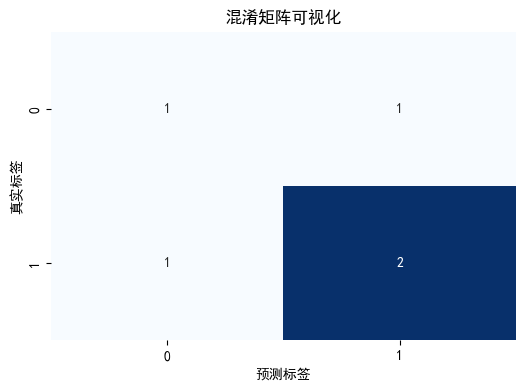

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# 示例真实标签和预测标签
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 1, 1, 0, 1]

# 计算混淆矩阵和指标
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("混淆矩阵:\n", conf_matrix)
print("精确率:", precision)
print("召回率:", recall)

# 使用matplotlib和seaborn可视化混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵可视化")
plt.show()

这段代码计算并可视化了分类模型的评价指标，包括混淆矩阵、精确率（Precision）和召回率（Recall）。下面详细解释每一个调用函数和参数的含义，以及常用的可选参数。

---

## 1. 导入库

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
```

- `numpy`：用于数组和矩阵运算。
- `matplotlib.pyplot`：用于数据可视化。
- `seaborn`：一个高级数据可视化库，简化了`matplotlib`的操作。
- `confusion_matrix`：计算模型的混淆矩阵。
- `precision_score`：计算模型的精确率。
- `recall_score`：计算模型的召回率。

---

## 2. 设置真实标签和预测标签

```python
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 1, 1, 0, 1]
```

- `y_true`：表示实际的类别标签，包含二分类的真实结果。
- `y_pred`：表示模型预测的类别标签，用于和真实标签比较，计算混淆矩阵和分类指标。

---

## 3. 计算混淆矩阵和指标

```python
conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
```

### 计算混淆矩阵 `confusion_matrix(y_true, y_pred)`

- `confusion_matrix(y_true, y_pred)`：计算模型的混淆矩阵。
  - `y_true`：实际标签。
  - `y_pred`：预测标签。
  
混淆矩阵的结构如下：
  
\[
\begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP} \\
\end{bmatrix}
\]

- **TN**（True Negative）：预测为负，且实际也为负。
- **FP**（False Positive）：预测为正，但实际为负。
- **FN**（False Negative）：预测为负，但实际为正。
- **TP**（True Positive）：预测为正，且实际也为正。

---

### 计算精确率 `precision_score(y_true, y_pred)`

- `precision_score(y_true, y_pred)`：计算预测的精确率，即预测为正样本中实际为正的比例。
  - `y_true`：实际标签。
  - `y_pred`：预测标签。

**常用参数**：
- `average`：用于多分类问题，决定精确率的平均方式。常用值有：
  - `'binary'`：二分类（默认值）。
  - `'macro'`：所有类别精确率的均值，不考虑类别样本数量。
  - `'micro'`：使用全局的TP、FP、FN计算精确率，适合样本不平衡的情况。
  - `'weighted'`：按每个类别的样本数量加权平均精确率。

---

### 计算召回率 `recall_score(y_true, y_pred)`

- `recall_score(y_true, y_pred)`：计算预测的召回率，即实际为正样本中被预测为正的比例。
  - `y_true`：实际标签。
  - `y_pred`：预测标签。

**常用参数**：
- `average`：用于多分类问题，常用值与`precision_score`中的相同。

---

## 4. 打印结果

```python
print("混淆矩阵:\n", conf_matrix)
print("精确率:", precision)
print("召回率:", recall)
```

- 输出计算得到的混淆矩阵、精确率和召回率，用于分析分类模型的表现。

---

## 5. 可视化混淆矩阵

```python
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵可视化")
plt.show()
```

### 可视化步骤说明

- `plt.figure(figsize=(6, 4))`：设置图表的大小。
- `sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)`：
  - `conf_matrix`：混淆矩阵数据。
  - `annot=True`：在热力图的单元格上显示具体数值。
  - `fmt="d"`：整数格式显示数据。
  - `cmap="Blues"`：颜色地图，使用蓝色渐变。
  - `cbar=False`：不显示颜色条。
  
- `plt.xlabel("预测标签")`：设置x轴标签。
- `plt.ylabel("真实标签")`：设置y轴标签。
- `plt.title("混淆矩阵可视化")`：设置图表标题。
- `plt.show()`：显示图表。

---

## 总结

这段代码实现了分类模型评估的主要指标计算，并通过混淆矩阵的可视化帮助直观分析模型的分类性能。精确率、召回率和混淆矩阵在不同分类问题中的表现各异，这些指标能帮助模型优化方向：提高精确率以减少误报或提升召回率以减少漏报。